In [1]:
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import os

In [2]:
plt_save_dir = "/home/trevor/boolean_network_data/plots_and_misc_material"

In [3]:
and_data_paths = ["boolean_network_data/cpu_and_evolution_results/2023-02-16-16-14-45", "boolean_network_data/cpu_and_evolution_results/2023-02-16-16-14-47", "boolean_network_data/cpu_and_evolution_results/2023-02-16-16-14-51"]
xor_data_paths = ["boolean_network_data/cpu_xor_evolution_results/2023-02-16-16-20-12", "boolean_network_data/cpu_xor_evolution_results/2023-02-16-16-17-24", "boolean_network_data/cpu_xor_evolution_results/2023-02-16-16-14-56", "boolean_network_data/cpu_xor_evolution_results/2023-02-16-16-14-55", "boolean_network_data/cpu_xor_evolution_results/2023-02-16-16-14-53"]

In [4]:
data_paths = and_data_paths
all_N = []
all_max_k = []
all_exp_errors = []
orgs = []
for path in data_paths:
    for file in glob.glob(os.path.join(os.getenv("HOME"), path, "*.npz")):
        data = np.load(file)
        all_N.append(data["N"])
        all_max_k.append(data["max_k"])
        all_exp_errors.append(data["errors"])
        orgs.append((data["functions"], data["connectivity"], data["used_connectivity"]))


In [5]:
%matplotlib tk
fig, axs = plt.subplots(figsize=(4,4))
for N, k, err in zip(all_N, all_max_k, all_exp_errors):
    axs.scatter([N], [err], color="C{}".format(k), label="k={}".format(k))
axs.plot([np.min(all_N), np.max(all_N)], [0.01, 0.01], color="black", linestyle="--")
#axs.set_ylim([np.min(all_exp_errors), 0.2])
axs.set_yscale("log")
axs.legend(*[*zip(*{l:h for h,l in zip(*axs.get_legend_handles_labels())}.items())][::-1])
axs.set_xlabel("N")
axs.set_ylabel("Logical Error Rate")
axs.set_title("AND")
fig.tight_layout()
#plt.savefig(os.path.join(plt_save_dir, "xor_nk.png"), dpi=400)



In [6]:
min_N = np.min(all_N)
min_max_k = np.min(all_max_k)
N_K_grid = np.ones((np.max(all_N) - min_N + 1, np.max(all_max_k) - min_max_k + 1))
for N, k, err in zip(all_N, all_max_k, all_exp_errors):
    this_idx_N = N - min_N
    this_idx_k = k - min_max_k
    if err < N_K_grid[this_idx_N, this_idx_k]:
        N_K_grid[this_idx_N, this_idx_k] = err


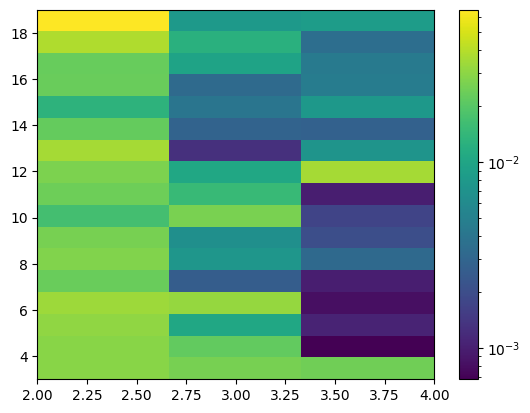

In [37]:
fig, axs = plt.subplots()
im = axs.imshow(N_K_grid, extent=(min_max_k, np.max(all_max_k), min_N, np.max(all_N)), origin="lower", aspect="auto", norm=LogNorm())
plt.colorbar(im)
